# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
%config Completer.use_jedi = False # this is a hack to get autocomplete working again on my machine

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print (brain)

Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [93]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
timestep = 0
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    timestep += 1
    if timestep % 25 ==0: print("\rTimestep: {}".format(timestep), end=' ')
    if done:                                       # exit loop if episode finished
        break
    
print("\nScore: {}".format(score))

Timestep: 300 
Score: 0.0


When finished, you can close the environment.
### Note
If running this sheet, I have been having problems in closing and restarting the environment.  <br>I haven't found a work-around for this. <br>So do not close it at this stage, if you want to proceed to the training stage

In [94]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
# import required libraries for training
import torch
import time

# import network and agent
from agent import Agent, ReplayBuffer

In [6]:
# check whether we have access to a GPU, if not, use a CPU.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Torch is currently using: {}'.format(device))

Torch is currently using: cpu


### Testing untrained agent
Test that the agent and network can interact with the Unity environment, by using an untrained agent.<br>
Note - this agent should perform no better than random action choices, because the neural network was randomly initialised

In [97]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
state_size = len(state)
print("State size: {}".format(state_size))
action_size = brain.vector_action_space_size
print('Number of actions: {}'.format(action_size))

score = 0  # initialize the score
test_agent = Agent(state_size, action_size, seed=2)
for i in range(300):
    action = test_agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score += reward
    state = next_state
    if i % 50 ==0:
        print ("action chosen on step {}: {}".format(i,action))
    if done:
        break

print("Score: {}".format(score))

State size: 37
Number of actions: 4
action chosen on step 0: 3
action chosen on step 50: 3
action chosen on step 100: 3
action chosen on step 150: 3
action chosen on step 200: 3
action chosen on step 250: 3
Score: -2.0


### Train the agent using a Deep-Q network

In [7]:
from collections import deque

In [99]:
def dqn(env, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, min_reward=13.0,
       averaging_period=100, file_save_name = 'checkpoint.pth'):
    """Deep Q Learning
    Params
    ======
        env: Unity environment
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start(float): starting value of epsilon, for epsilon-greedy action selection
        eps_end(float): lowest value of epsilon - i.e keep some exploration
        eps_decay(float): how fast to decay the epsilon rate
        min_reward(float): lowest reward required for the agent to learn
        averaging_period (int): number of most recent episodes which have to average to the min_reward
        file_save_name (str): name of file to save the checkpoint
    """
    
    # get the default brain and environment info to display
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state_size = len(env_info.vector_observations[0])
    action_size = brain.vector_action_space_size
    
    print ("Environment initialised. \nState size: {}\nAction size: {}\nBrain: {}"
           .format(state_size, action_size ,brain))
    
    # intitialize the Agent
    agent = Agent(state_size=state_size, action_size=action_size, seed=42)
    print ("Agent initialized")
    
    start = time.time()
    
    scores=[]    # list containing scores for each episode
    scores_window = deque(maxlen=averaging_period)   # the most recent scores to average over
    eps = eps_start # initialize epsilon
    for i_episode in range (1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                 # agent chooses action via the deep network
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # get the 'done' flag
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)  # save the most recent score
        scores.append(score)         # save the most recent score
        eps = max(eps_end, eps*eps_decay) # decrease epsilon
        print ("\rEpisode: {}\tAverage score: {:.1f}".format(i_episode, np.mean(scores_window)), end='')
        if i_episode % 50 == 0:
            elapsed = time.time() - start
            print ("\rEpisode: {}\tAverage score: {:.1f}\tTime elapsed: {:.0f}s"
                   .format(i_episode, np.mean(scores_window), elapsed))
        if np.mean(scores_window) > min_reward:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), file_save_name)
            break
    print ("\nTotal time taken: {:.0f}s".format(time.time() - start))
    return scores

In [100]:
scores = dqn(env, n_episodes=2000, min_reward = 13.0, averaging_period=100, file_save_name='checkpoint13.pth')

Environment initialised. 
State size: 37
Action size: 4
Brain: Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Agent initialized
Episode: 50	Average score: 0.1	Time elapsed: 66s
Episode: 100	Average score: 0.9	Time elapsed: 133s
Episode: 150	Average score: 2.7	Time elapsed: 195s
Episode: 200	Average score: 4.1	Time elapsed: 258s
Episode: 250	Average score: 5.2	Time elapsed: 320s
Episode: 300	Average score: 6.5	Time elapsed: 385s
Episode: 350	Average score: 7.4	Time elapsed: 452s
Episode: 400	Average score: 8.5	Time elapsed: 517s
Episode: 450	Average score: 10.4	Time elapsed: 582s
Episode: 500	Average score: 12.5	Time elapsed: 654s
Episode: 525	Average score: 13.0
Environ

### Examine the learning evolution of the agent during training

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.fugure_format = 'retina'

import pandas as pd

In [102]:
# create moving average data by using pandas
df =pd.DataFrame(scores,columns=['score'])
df['mavg'] = df['score'].rolling(100).mean()
df.tail()

,score,mavg
520,11.0,12.71
521,15.0,12.79
522,18.0,12.92
523,13.0,13.00
524,13.0,13.04


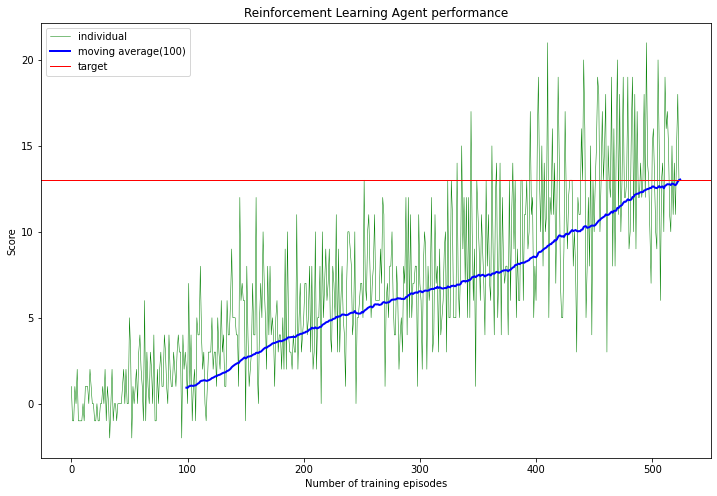

In [103]:
# Plot the individual scores and the moving average
plt.figure(figsize=(12,8))
plt.plot(df['score'], color='g',linewidth=0.5)
plt.plot(df['mavg'], color='b',linewidth=2)
plt.plot()
plt.axhline(13, color='r',linewidth=1)
plt.xlabel('Number of training episodes')
plt.ylabel('Score')
plt.title('Reinforcement Learning Agent performance')
plt.legend(['individual','moving average(100)','target']);

### See how the agent performs in a one-off episode
Note, because the moving average (100) is above 13, this doesn't necessarily guarantee that an individual episode with the trained agent will score >= 13, but the trend is upwards, so we are hopeful!

In [6]:
# load the weights from a checkpoint
state_dict = torch.load('checkpoint13.pth')
# examine the keys
print (state_dict.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [11]:
trained_agent = Agent(state_size, action_size, seed=2)

In [12]:
trained_agent.qnetwork_local.load_state_dict(state_dict)
trained_agent.qnetwork_local.eval() # need to set the model to evaluation mode - this turns off processes such
# as batch-normalization and dropout. I haven't actually used either in this case, but it's a good habit.
# The opposite would be to use model.train() to turn these items back on.

QNetwork(
  (fc1): Linear(in_features=37, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=4, bias=True)
  (dropout): Dropout(p=0.5)
)

In [14]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state

score = 0  # initialize the score

for i in range(300):
    action = trained_agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score += reward
    state = next_state
    if i % 50 ==0:
        print ("action chosen on step {}: {}".format(i,action))
    if done:
        break

print("Score: {}".format(score))

action chosen on step 0: 2
action chosen on step 50: 0
action chosen on step 100: 0
action chosen on step 150: 0
action chosen on step 200: 0
action chosen on step 250: 0
Score: 16.0


In my notebook, the first run on evaluation produced a score of 16.

Examine how much better we can get the score. <br>On my Macbook, it took c. 10 minutes to train from scratch, having gone through 525 episodes.<br>This achieved the target of a score of 13.<br>I plan to load those weights, and train for a futher 3000 episodes (which should be roughly an hour), and with no upper limit to the score, to see how high we can get it.

In [15]:
trained_agent.qnetwork_local.train() # reset the network to training

QNetwork(
  (fc1): Linear(in_features=37, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=4, bias=True)
  (dropout): Dropout(p=0.5)
)

In [18]:
# I have to amend the dqn function slightly, as this time, we don't want it to stop after a target is reached
def dqn_max(env, agent, n_episodes=3000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995,
            averaging_period=100, file_save_name = 'checkpoint_3000.pth'):
    """Deep Q Learning
    Params
    ======
        env: Unity environment
        trained_agent: pass in previously trained agent (or untrained)
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start(float): starting value of epsilon, for epsilon-greedy action selection
        eps_end(float): lowest value of epsilon - i.e keep some exploration
        eps_decay(float): how fast to decay the epsilon rate
        file_save_name (str): name of file to save the checkpoint
    """
    
    # get the default brain and environment info to display
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state_size = len(env_info.vector_observations[0])
    action_size = brain.vector_action_space_size
    
    print ("Environment initialised. \nState size: {}\nAction size: {}\nBrain: {}"
           .format(state_size, action_size ,brain))
    
    start = time.time()
    
    scores=[]    # list containing scores for each episode
    scores_window = deque(maxlen=averaging_period)   # the most recent scores to average over
    eps = eps_start # initialize epsilon
    for i_episode in range (1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)                 # agent chooses action via the deep network
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # get the 'done' flag
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)  # save the most recent score
        scores.append(score)         # save the most recent score
        eps = max(eps_end, eps*eps_decay) # decrease epsilon
        print ("\rEpisode: {}\tAverage score: {:.1f}".format(i_episode, np.mean(scores_window)), end='')
        if i_episode % 50 == 0:
            elapsed = time.time() - start
            est_total_time = elapsed * (n_episodes / i_episode)
            time_to_complete_mins = (est_total_time - elapsed)/60
            print ("\rEpisode: {}\tAverage score: {:.1f}\tTime elapsed: {:.0f}s\t Estimate to complete: {:.1f}mins"
                   .format(i_episode, np.mean(scores_window), elapsed, time_to_complete_mins))
    print ("\nTotal time taken: {:.0f}s".format(time.time() - start))
    torch.save(agent.qnetwork_local.state_dict(), file_save_name)
    return scores

In [19]:
scores = dqn_max(env=env, agent = trained_agent,n_episodes=3000, file_save_name='checkpoint_max.pth')

Environment initialised. 
State size: 37
Action size: 4
Brain: Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Episode: 50	Average score: 0.5	Time elapsed: 59s	 Estimate to complete: 58.5mins
Episode: 100	Average score: 1.4	Time elapsed: 116s	 Estimate to complete: 56.2mins
Episode: 150	Average score: 3.2	Time elapsed: 171s	 Estimate to complete: 54.3mins
Episode: 200	Average score: 4.4	Time elapsed: 235s	 Estimate to complete: 54.9mins
Episode: 250	Average score: 5.5	Time elapsed: 293s	 Estimate to complete: 53.8mins
Episode: 300	Average score: 7.5	Time elapsed: 356s	 Estimate to complete: 53.3mins
Episode: 350	Average score: 9.7	Time elapsed: 417s	 Estimate to complete

In [49]:
# create moving average data by using pandas
df2 =pd.DataFrame(scores,columns=['score'])
df2['mavg'] = df2['score'].rolling(100).mean()
df2['mavg250'] = df2['score'].rolling(250).mean()
df2.tail()

,score,mavg,mavg250
2995,18.0,15.34,15.328
2996,20.0,15.37,15.356
2997,20.0,15.43,15.368
2998,19.0,15.52,15.368
2999,12.0,15.46,15.348


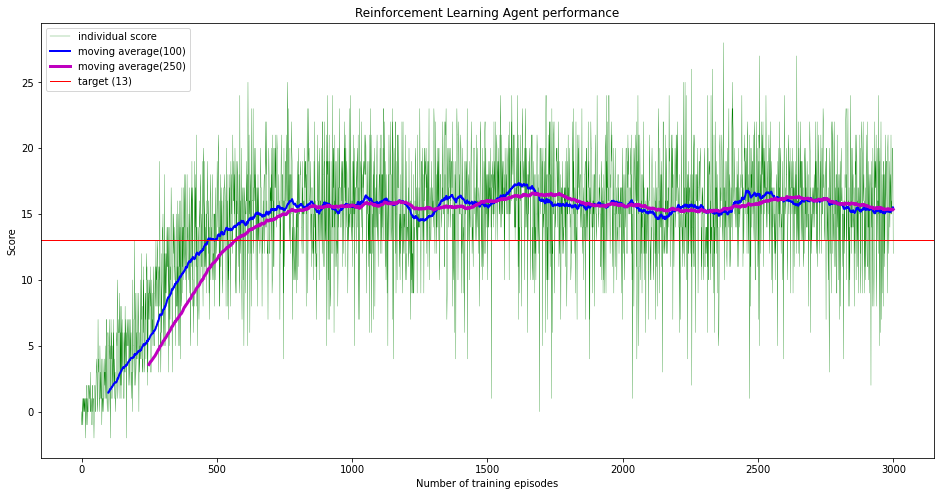

In [51]:
# Plot the individual scores and the moving average
plt.figure(figsize=(16,8))
plt.plot(df2['score'], color='g',linewidth=0.3)
plt.plot(df2['mavg'], color='b',linewidth=2)
plt.plot(df2['mavg250'], color='m',linewidth=3)
plt.axhline(13, color='r',linewidth=1)
plt.plot()
plt.xlabel('Number of training episodes')
plt.ylabel('Score')
plt.title('Reinforcement Learning Agent performance')
plt.legend(['individual score','moving average(100)','moving average(250)','target (13)']);

* Using this agent, with the Q-network we used, the agent doesn't really appear to get trained better than c. 15.5
* From examining the reporting by episode a few cells up, I can see from scanning that it did reach a maximum of 17.1 
* From inspection of the graph above, looking at the moving average over 250 episodes, it appears that the training reaches a plateau around episode 800. So, will have a look at the spread of results
* In hindsight, I should have coded it to check every 50 episodes, and save the weights if the highest score was reached.
* However, this variation in score could just have been explained by the statistical variation in results, given that the agent is still exploring the environment with epsilon 0.01 (i.e. 1% of all actions are purely random).
* So, in an episode of 300, this would involve on average 3 random moves.

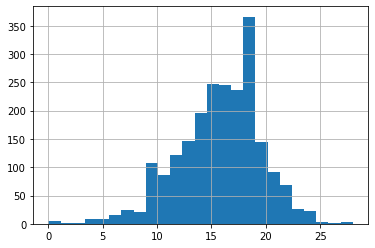

In [64]:
# Examine the spread of results - once trained
df2['score'][800:].hist(bins=25);

In [65]:
# find the maximum score recorded.
df2['score'].max()

28.0

## See how this agent performs in a one-off episode

In [9]:
# load the weights from a checkpoint
state_dict = torch.load('checkpoint_max.pth')
trained_agent = Agent(state_size, action_size, seed=2)
trained_agent.qnetwork_local.load_state_dict(state_dict)
trained_agent.qnetwork_local.eval()

QNetwork(
  (fc1): Linear(in_features=37, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=4, bias=True)
  (dropout): Dropout(p=0.5)
)

Run the trained agent for 10 episodes

In [21]:
scores = []

for i_episode in range (10):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment    
    state = env_info.vector_observations[0]            # get the current state    
    score = 0  # initialize the score

    for i in range(300):
        action = trained_agent.act(state)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        score += reward
        state = next_state
        if done:
            break
    scores.append(score)
    print ("Score for episode {}: {:.0f}".format(i_episode,score))

Score for episode 0: 22
Score for episode 1: 10
Score for episode 2: 12
Score for episode 3: 14
Score for episode 4: 21
Score for episode 5: 14
Score for episode 6: 17
Score for episode 7: 12
Score for episode 8: 18
Score for episode 9: 17


#### Average score for the trained agent across 10 runs

In [22]:
np.array(scores).mean()

15.7

In [23]:
env.close()